# UCI Wine Quality Assessment
### Predicting quality of white wine given 11 physiochemical attributes
### (https://www.kaggle.com/c/uci-wine-quality-dataset/data)

### Dataset Information

We have 2 datsets:

winequality-data.csv - Training data (all attributes, and corresponding quality) ; 3918 rows X 13 columns

winequality-solution-input.csv - Test data (attributes only) ; 980 rows X 13 columns

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

### Objective
The goal is to predict the quality given those physicochemical attributes. Only the white wine dataset is used here.

### Data fields
#### Input/Feature variables (based on physicochemical tests): 

1 - fixed acidity 

2 - volatile acidity 

3 - citric acid 

4 - residual sugar 

5 - chlorides 

6 - free sulfur dioxide 

7 - total sulfur dioxide

8 - density 

9 - pH 

10 - sulphates 

11 - alcohol

#### Output/Target variable (based on sensory data): 

12 - quality (score between 0 (very bad) and 10 (very excellent))

#### Other:

13 - id (unique ID for each sample, needed for submission)

## Import Libraries

In [1]:
#Data Processing Libraries
import numpy as np
import pandas as pd

#Data Vizuaization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Library
from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.linear_model import LinearRegression # Multiple linear regression
from sklearn.preprocessing import PolynomialFeatures # Polynomial Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor # Random Forest Regression
from sklearn.svm import SVR  #Support Vector Machines

## Get Data

In [2]:
data_train = pd.read_csv('C:\\Users\\jagan\\OneDrive\\Documents\\Github_Portfolio\\Data Science and Machine Learning\\data\\winequality-data.csv')
data_test = pd.read_csv('C:\\Users\\jagan\\OneDrive\\Documents\\Github_Portfolio\\Data Science and Machine Learning\\data\\winequality-solution-input.csv')

## Performing Descriptive Statistics

### Taking first peek into the data structure

In [3]:
print('Train data Shape -->' , data_train.shape)
print('Test data Shape -->' , data_test.shape)

Train data Shape --> (3918, 13)
Test data Shape --> (980, 12)


Test data set has 1 column less which is the "quality" column that we have to predict based on the training datset

In [4]:
data_train.head() # Fetching top 5 rows

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [5]:
data_train.drop(axis=0, columns='id').head() # Dropped the "id" column (unique ID for each sample)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5


### Assess Data Quality & Missing Values

In [6]:
# Assess missing values in Training dataset
print("Assess missing values in Training dataset")
data_train.isnull().sum()

Assess missing values in Training dataset


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
id                      0
dtype: int64

In [7]:
# Assess missing values in Test dataset
print("Assess missing values in Test dataset")
data_test.isnull().sum()

Assess missing values in Test dataset


fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
id                      0
dtype: int64

#### There is no missing data in any columns of train and test dataset!

### Univariate Analysis

In [8]:
data_train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,id
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.854620,0.278027,0.333201,6.405819,0.045566,35.326187,138.395227,0.994026,3.187989,0.489704,10.518765,5.877489,2939.500000
std,0.841879,0.100459,0.121375,5.107972,0.021138,17.158043,42.996820,0.003025,0.150022,0.114186,1.237195,0.890364,1131.173506
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000,981.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,107.250000,0.991700,3.090000,0.410000,9.500000,5.000000,1960.250000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000,2939.500000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,168.000000,0.996160,3.280000,0.550000,11.400000,6.000000,3918.750000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.800000,1.080000,14.200000,9.000000,4898.000000


#### Observations:

1. Counts are same of all column. So there is no missing data
2. Residual Sugar (5.1) , free_sulphur_dioxide (17.15) , total_sulfur_dioxide (42.98) have high standard deviation. A high standard deviation indicates that the data points are spread out over a wider range of values.
3. Residual Sugar (Min - 0.6 ; Max - 65.8)  , free_sulphur_dioxide(Min - 3 , Max - 289)  and total_sulphur_dioxide(Min - 9 , Max - 440). We will do a box plot for have a better view of these data

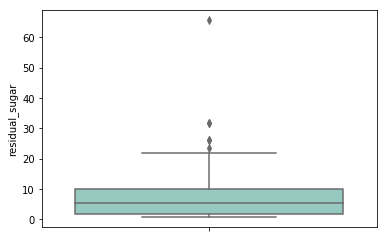

In [18]:
sns.boxplot(x=data_train["residual_sugar"],orient="v", palette="Set3")
plt.show()

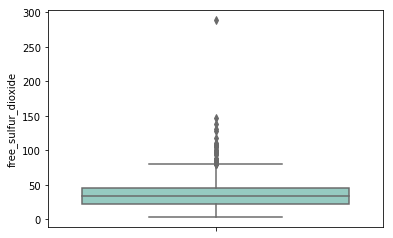

In [15]:
sns.boxplot(x=data_train["free_sulfur_dioxide"],orient="v", palette="Set3")
plt.show()

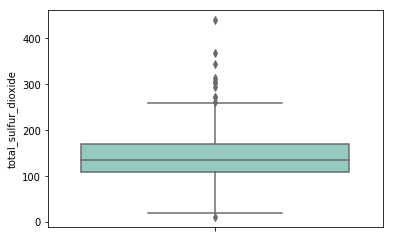

In [16]:
sns.boxplot(x=data_train["total_sulfur_dioxide"],orient="v", palette="Set3")
plt.show()

### Bi-Variate Analysis by vizualizing the data by computing pairwise correlation of columns

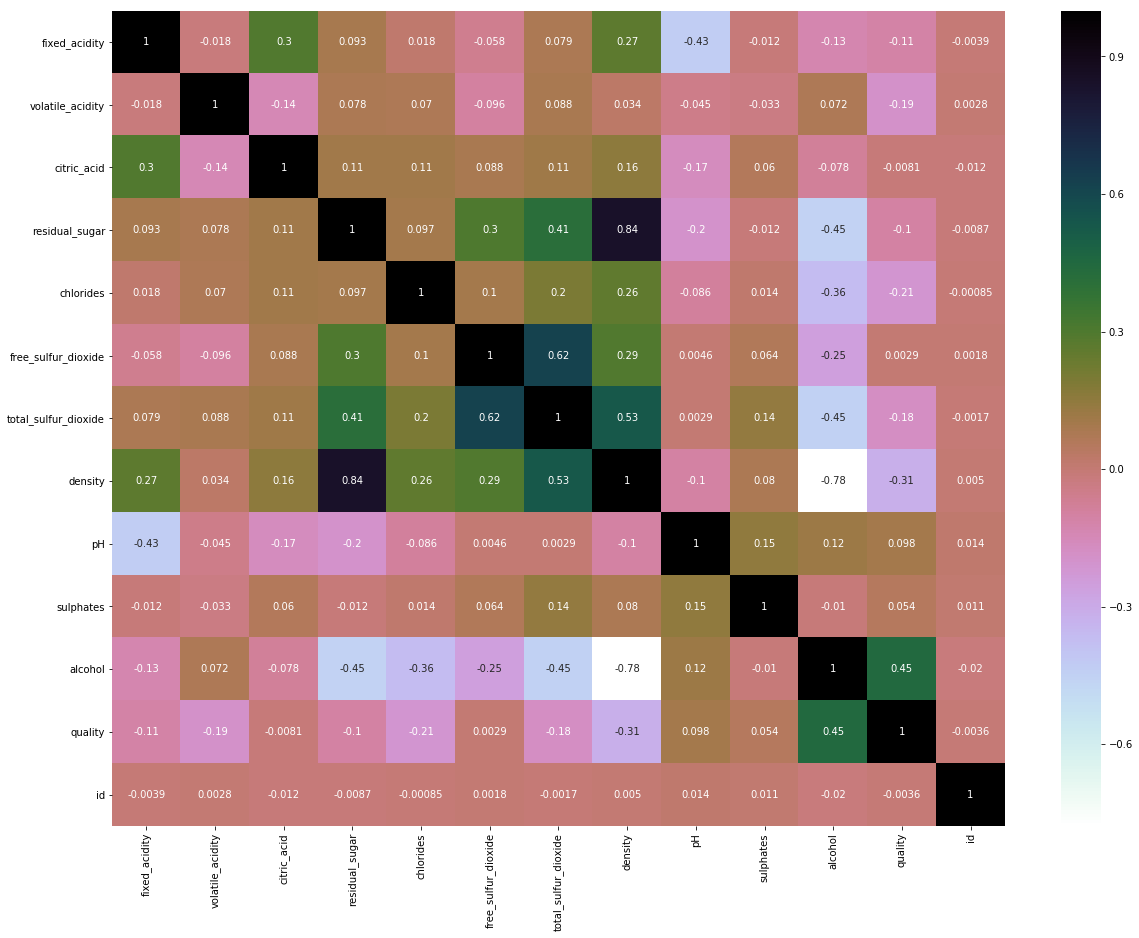

In [19]:
plt.figure(figsize=(20,15)) 
sns.heatmap(data_train.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()